<a href="https://colab.research.google.com/github/mansibhakare11/DL_ASS/blob/main/DL_LAB_ASS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Course Name: Deep Learning

Lab Title: Research Paper Implementation with Pre-trained Model(Deep Residual Learning for Image Recognition)

Student Name:[Bhakare Mansi Namdev]

Student ID:[202302040005]

Date of Submission: [25th april]

Group Members:

Bhakare Mansi

khairnar Khushi

Dahat Pratik



In [ ]:
!pip install kaggle
!pip install tensorflow
!pip install matplotlib scikit-learn seaborn


In [ ]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mansibhakare","key":"a654fd415bad62cc7b94f9ba09f93480"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json



In [ ]:
!kaggle datasets download -d puneet6060/intel-image-classification



Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors


In [ ]:
!unzip intel-image-classification.zip


Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download the dataset
!kaggle datasets download -d puneet6060/intel-image-classification
!unzip -q intel-image-classification.zip

# Dataset Directory (corrected)
train_dir = '/content/seg_train/seg_train'

# Image Parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)


Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification
License(s): copyright-authors
intel-image-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
replace seg_pred/seg_pred/10004.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


Task 2: Model Implementation and Fine-tuning

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load Pre-trained Model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze Layers
for layer in base_model.layers:
    layer.trainable = False

# Add Custom Layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


IndexError: index 3 is out of bounds for axis 3 with size 3

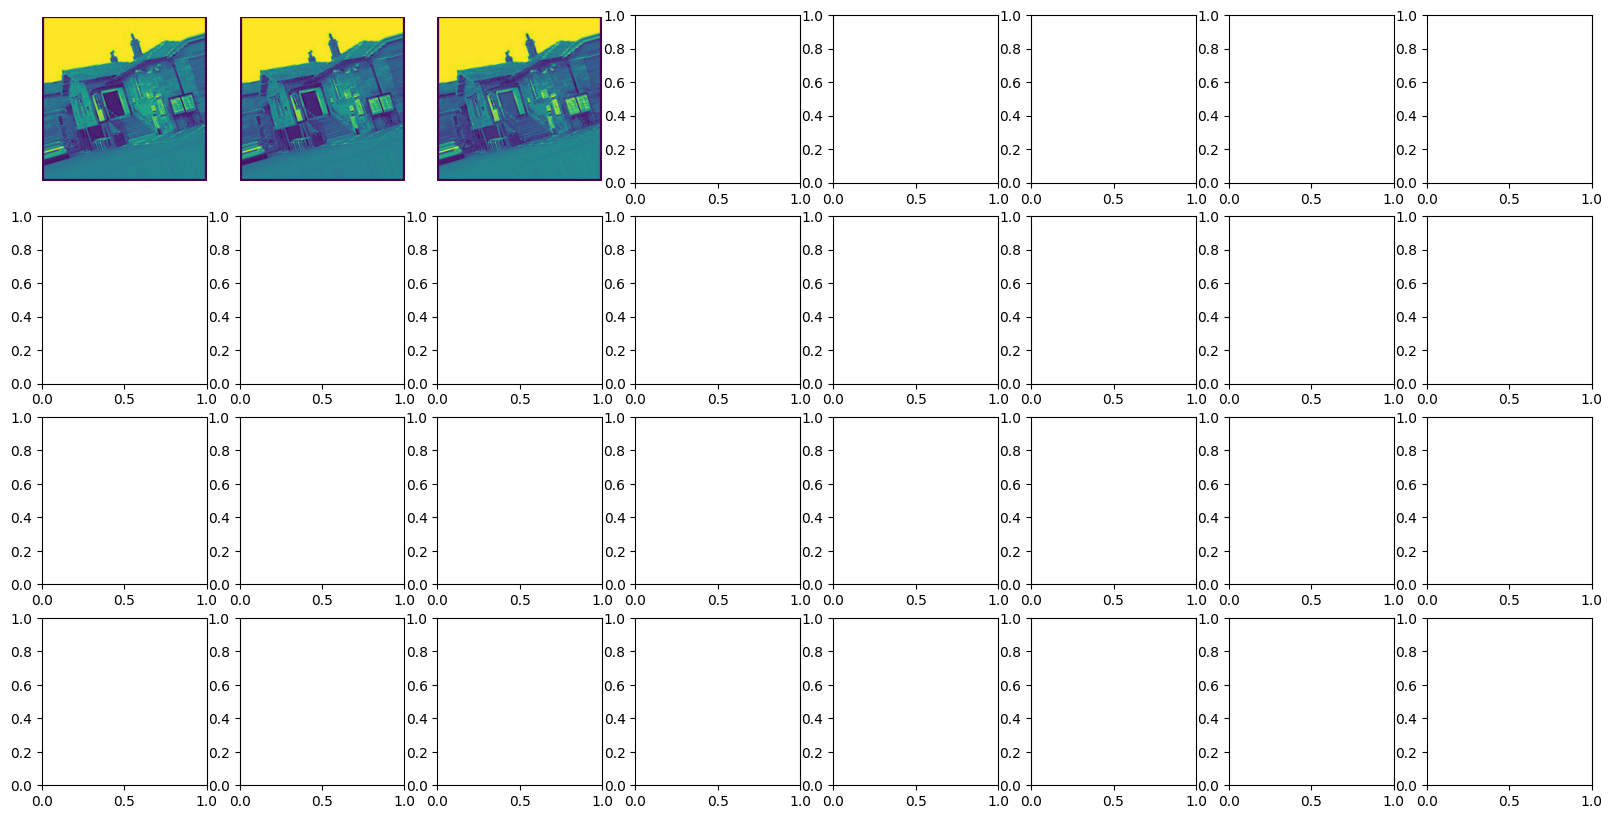

In [ ]:
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Visualize feature maps
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

sample_batch = next(train_gen)
sample_image = sample_batch[0][0]
sample_image_input = np.expand_dims(sample_image, axis=0)

activations = activation_model.predict(sample_image_input)

fig, axs = plt.subplots(4, 8, figsize=(20, 10))
axs = axs.flatten()

for i in range(32):
    axs[i].imshow(activations[0][0, :, :, i], cmap='viridis')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
history = model.fit(
    train_gen,
    epochs=2,
    validation_data=val_gen
)


Epoch 1/2
351/351 ━━━━━━━━━━━━━━━━━━━━ 162s 461ms/step - accuracy: 0.4515 - loss: 1.3739 - val_accuracy: 0.4693 - val_loss: 1.3312
Epoch 2/2
351/351 ━━━━━━━━━━━━━━━━━━━━ 163s 464ms/step - accuracy: 0.4754 - loss: 1.3032 - val_accuracy: 0.4754 - val_loss: 1.2875


In [ ]:
loss, acc = model.evaluate(val_gen)
print(f"Validation Accuracy: {acc*100:.2f}%")


88/88 ━━━━━━━━━━━━━━━━━━━━ 33s 378ms/step - accuracy: 0.4931 - loss: 1.2954
Validation Accuracy: 47.75%


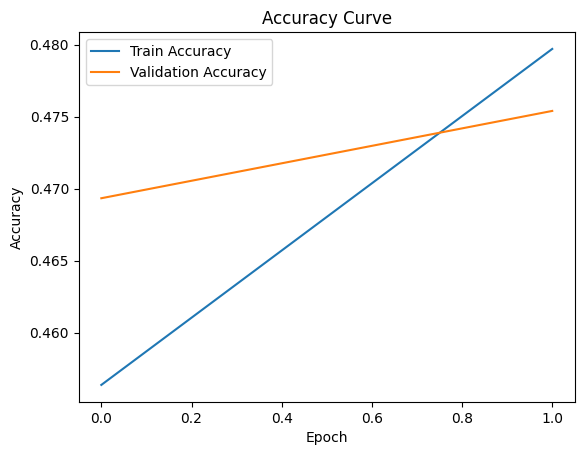

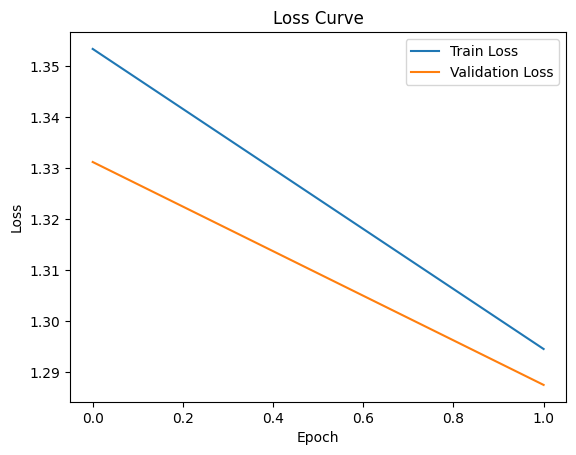

In [ ]:
# Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss Plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


88/88 ━━━━━━━━━━━━━━━━━━━━ 45s 414ms/step


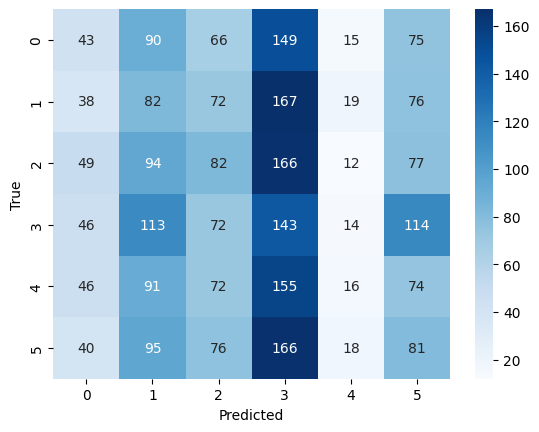

              precision    recall  f1-score   support

   buildings       0.16      0.10      0.12       438
      forest       0.15      0.18      0.16       454
     glacier       0.19      0.17      0.18       480
    mountain       0.15      0.28      0.20       502
         sea       0.17      0.04      0.06       454
      street       0.16      0.17      0.17       476

    accuracy                           0.16      2804
   macro avg       0.16      0.16      0.15      2804
weighted avg       0.16      0.16      0.15      2804



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
Y_pred = model.predict(val_gen)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(val_gen.classes, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification Report
print(classification_report(val_gen.classes, y_pred, target_names=list(val_gen.class_indices.keys())))
